In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv("./data/city_data.csv")
ride_data =pd.read_csv("./data/ride_data.csv")

# Combine the data into a single dataset
city_ride_data=pd.merge(city_data,ride_data)

# Display the data table for preview
city_ride_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

Text(45, 39, 'Circle size correlates with driver count per city')

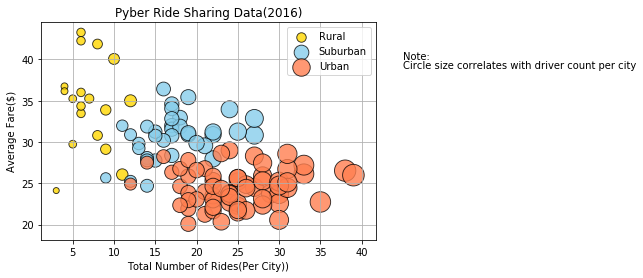

In [19]:
citytype=city_ride_data.groupby('type')
citytype.count()

color_map={'Urban':'Coral','Suburban':'Skyblue','Rural':'gold'}

for key, group in citytype: 
    subgroup=group.groupby('city')
    x=subgroup["ride_id"].count()
    y=subgroup["fare"].mean()
    s=subgroup["driver_count"].count()
    #colors=['Gold', 'SkyBlue', 'Coral']
    groups=('Urban','Suburban','Rural')
    plt.scatter(x, y,s=s*12,c=color_map[key],linewidth=0.9, alpha=0.8,edgecolor='black',label=key,)
    
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides(Per City))")
plt.ylabel("Average Fare($)")
plt.legend()
plt.grid()
plt.text(45,40,"Note:")
plt.text(45,39,"Circle size correlates with driver count per city")


Text(0.5, 1.0, '% of Total Fares by city Type')

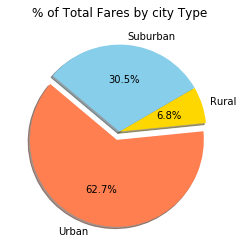

In [68]:
###### Calculate Type Percents


fare_data=city_ride_data[['type','fare']]
fare_data.head()
fare_data=fare_data.groupby("type").sum()
fare_data
total_fare=city_ride_data["fare"].sum()
total_fare
fare_data['% of Total Fares by city Type']=fare_data['fare']/total_fare
fare_data

output=fare_data.style.format({'% of Total Fares by city Type': '{:,.1%}'.format})
output

labels = ["Urban", "Rural", "Suburban"]

# The values of each section of the pie chart
sizes = [62.7, 6.8, 30.5]

# The colors of each section of the pie chart
colors = ["coral", "Gold","skyBlue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

plt.pie(sizes,explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Fares by city Type")


# Build Pie Chart

# Save Figure


## Total Fares by City Type

## Total Rides by City Type

Text(0.5, 1.0, '% of Total Rides by city Type')

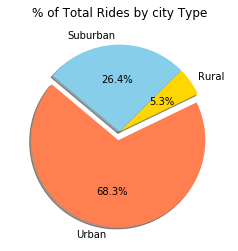

In [86]:
# Calculate Ride Percents

ride_data=city_ride_data[['type','ride_id']]
ride_data.head()


ride_data=ride_data.groupby("type").count()
ride_data
total_ride=ride_data['ride_id'].sum()
total_ride
ride_data['% of Total rides by city Type']=ride_data['ride_id']/total_ride
ride_data

output1=ride_data.style.format({'% of Total Fares by city Type': '{:,.1%}'.format})
output1

labels = ["Urban", "Rural", "Suburban"]

#The values of each section of the pie chart
sizes = [68.4, 5.3, 26.5]

# The colors of each section of the pie chart
colors = ["coral", "Gold","skyBlue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

plt.pie(sizes,explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Rides by city Type")
# Build Pie Chart

# Save Figure


## Total Drivers by City Type

Text(0.5, 1.0, '% of Total Drivers by city Type')

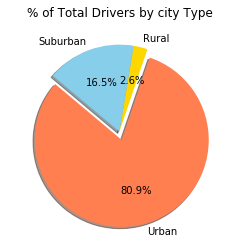

In [120]:
# Calculate Driver Percents


driver_data=city_ride_data[['type','city','driver_count']]
driver_data.head()

driver_data=driver_data.drop_duplicates(subset="city",keep='first', inplace=False)
driver_data

driver_data=driver_data[['type','driver_count']]
driver_data   

driver_data=driver_data.groupby("type").sum()
driver_data

total_driver=driver_data['driver_count'].sum()
total_driver
driver_data['% of Total drivers by city Type']=driver_data['driver_count']/total_driver
driver_data

output2=driver_data.style.format({'% of Total drivers by city Type': '{:,.1%}'.format})
output2

#labels = ["Urban", "Rural", "Suburban"]

#The values of each section of the pie chart
sizes = [80.9, 2.6, 16.5]

# The colors of each section of the pie chart
colors = ["coral", "Gold","skyBlue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

plt.pie(sizes,explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Drivers by city Type")

# Build Pie Charts

# Save Figure
